In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive


In [ ]:
cd gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
cd image-captioning

/content/gdrive/MyDrive/image-captioning


In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

In [ ]:
images_path = 'Images/'
images = glob(images_path+'*.jpg')


In [ ]:
images[:5]


['Images/381976882_0063d16d88.jpg',
 'Images/3741462565_cc35966b7a.jpg',
 'Images/3728164558_52729baefa.jpg',
 'Images/374176648_ba4b88c221.jpg',
 'Images/3759230208_1c2a492b12.jpg']

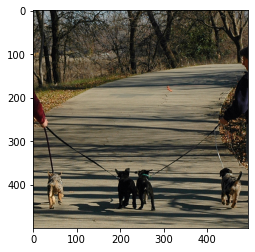

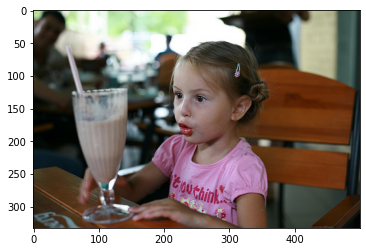

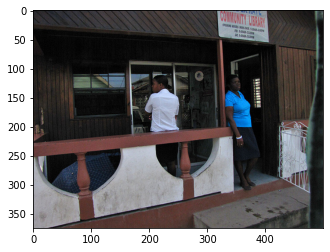

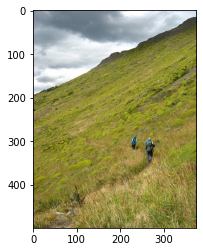

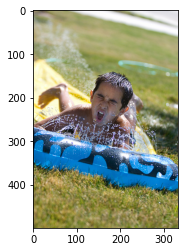

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [ ]:
from keras.applications import ResNet50

incept_model = ResNet50(include_top=True)

102967424/102967424 [==============================] - 5s 0us/step


In [ ]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)


In [ ]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 7999:
        break
        
    elif count % 50 == 0:
        print(count)

1/1 [==============================] - 0s 20ms/step
50
1/1 [==============================] - 0s 24ms/step
100
1/1 [==============================] - 0s 22ms/step
150
1/1 [==============================] - 0s 21ms/step
200
1/1 [==============================] - 0s 19ms/step
250
1/1 [==============================] - 0s 22ms/step
300
1/1 [==============================] - 0s 19ms/step
350
1/1 [==============================] - 0s 19ms/step
400
1/1 [==============================] - 0s 21ms/step
450
1/1 [==============================] - 0s 19ms/step
500
1/1 [==============================] - 0s 23ms/step
550
1/1 [==============================] - 0s 21ms/step
600
1/1 [==============================] - 0s 19ms/step
650
1/1 [==============================] - 0s 22ms/step
700
1/1 [==============================] - 0s 22ms/step
750
1/1 [==============================] - 0s 19ms/step
800
1/1 [==============================] - 0s 18ms/step
850
1/1 [==============================] - 0s 21ms/st

In [ ]:
len(images_features)


1700

In [ ]:
caption_path = 'captions.txt'


In [ ]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [ ]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split(',')[0]
        caption = i.split(',')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
        
    except:
        pass

In [ ]:
len(captions_dict)

3000

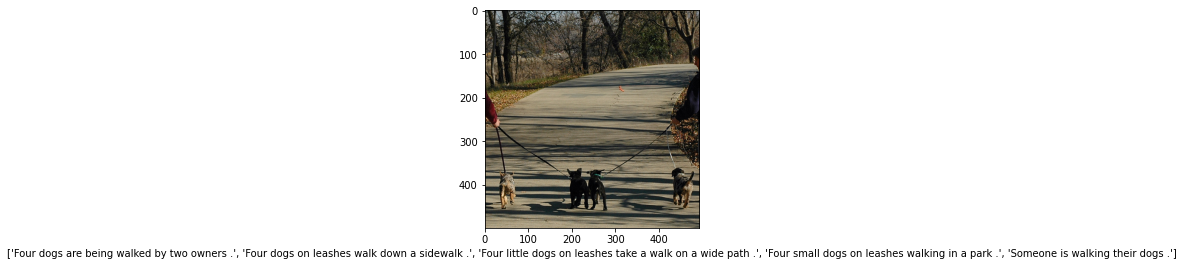

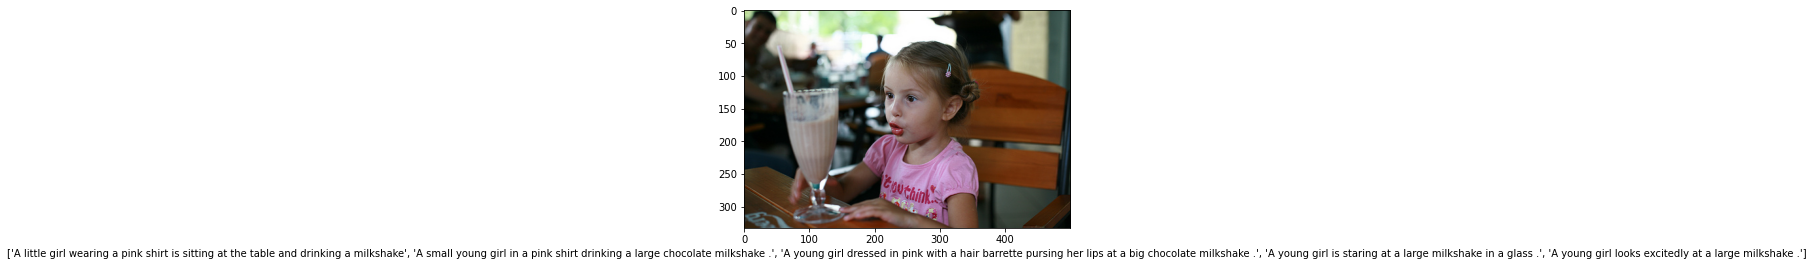

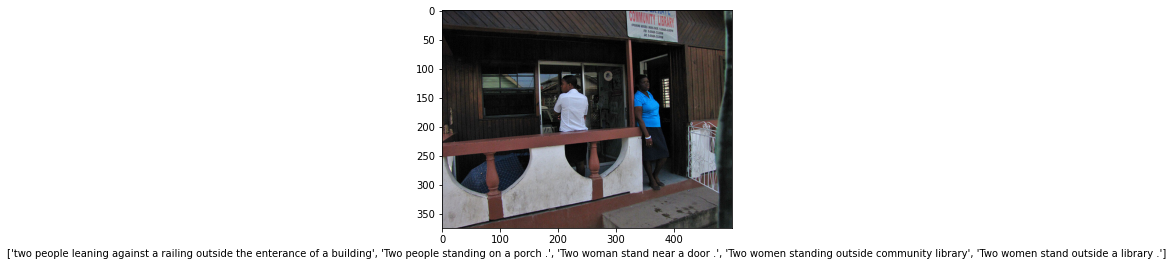

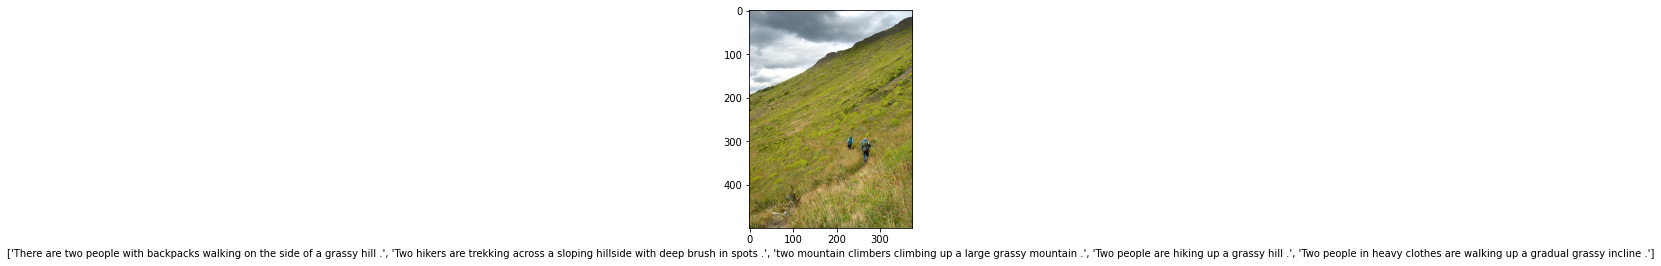

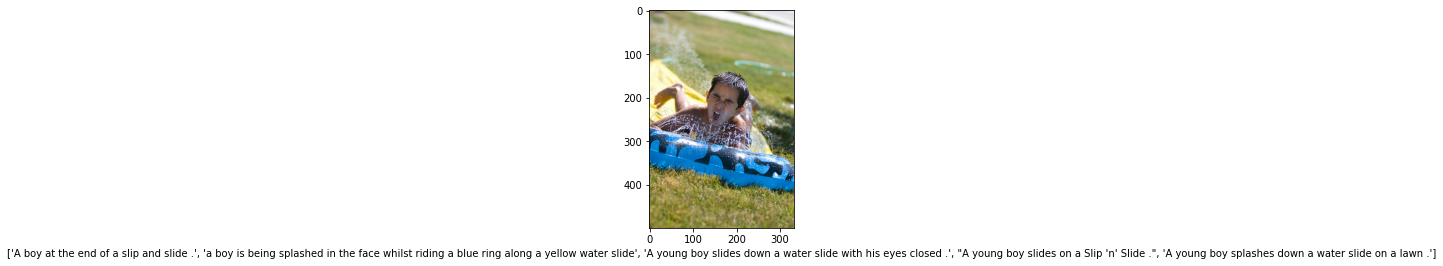

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

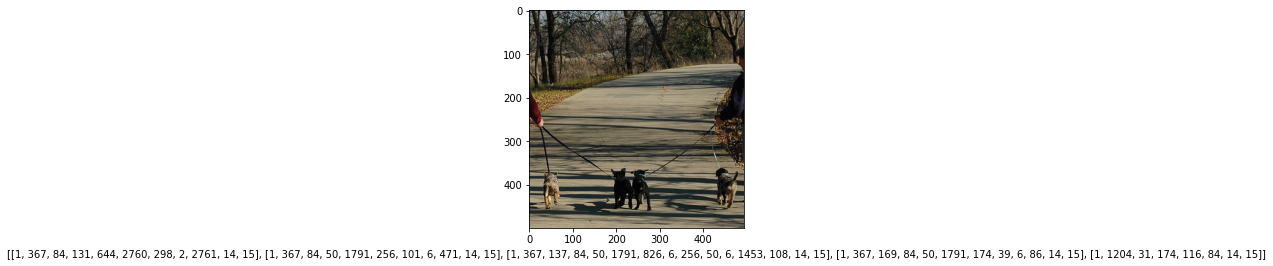

In [ ]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()
    
    img_name = 'Images/' + k
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [ ]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified
    

In [ ]:

for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [ ]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [ ]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1
        

In [ ]:

new_dict[''] = len(new_dict) 


In [ ]:
captions_backup = captions_dict.copy()


In [ ]:
captions_dict = captions_backup.copy()


In [ ]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict[''])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [ ]:
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2, 3, 4, 2, 5, 6, 2, 7, 8, 9]
[1, 2, 10, 11, 2, 12, 13, 14, 15, 2, 7, 11, 2, 16, 8, 9]
[1, 2, 10, 17, 2, 18, 19, 20, 2, 12, 13, 21, 22, 2, 7, 11, 2, 23, 8, 9]
[1, 26, 48, 38, 11, 26, 45, 46, 49, 20, 29, 39, 50, 51, 52, 40, 2, 53, 41, 8, 9]
[1, 26, 75, 76, 21, 77, 26, 37, 38, 78, 28, 79, 80, 81, 20, 82, 40, 80, 75, 83, 8, 9]
[1, 26, 86, 88, 26, 100, 101, 52, 40, 2, 93, 102, 26, 103, 21, 104, 2, 105, 85, 2, 31, 44, 80, 106, 8, 9]
[1, 2, 178, 67, 54, 17, 155, 179, 20, 2, 180, 177, 129, 2, 181, 74, 2, 175, 11, 182, 183, 184, 51, 185, 2, 186, 11, 182, 187, 184, 8, 9]
[1, 2, 54, 44, 698, 40, 182, 747, 21, 393, 30, 26, 10, 44, 2, 127, 19, 20, 29, 1137, 27, 28, 436, 577, 532, 11, 262, 85, 2, 29, 370, 332, 8, 9]


In [ ]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out
    
    

In [ ]:
X, y_in, y_out = generator(images_features, captions_dict)


In [ ]:
X = np.array(X)


In [ ]:
y_in = np.array(y_in, dtype='float64')


In [ ]:
y_out = np.array(y_out, dtype='float64')

In [ ]:
X.shape, y_in.shape, y_out.shape


((116028, 2048), (116028, 32), (116028, 4412))

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from keras.layers import add
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from tensorflow.keras.models import Sequential, Model

In [ ]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVector  (None, 32, 128)          0         
 )                                                               
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 128)           535296    
                                                                 
 lstm (LSTM)                 (None, 32, 256)           394240    
                            

In [ ]:
model.fit([X, y_in], y_out, batch_size=512, epochs=200)

Epoch 1/200
203/203 [==============================] - 23s 80ms/step - loss: 5.1031 - accuracy: 0.1674
Epoch 2/200
203/203 [==============================] - 16s 79ms/step - loss: 4.5452 - accuracy: 0.2335
Epoch 3/200
203/203 [==============================] - 16s 78ms/step - loss: 4.3539 - accuracy: 0.2543
Epoch 4/200
203/203 [==============================] - 15s 76ms/step - loss: 4.2574 - accuracy: 0.2632
Epoch 5/200
203/203 [==============================] - 15s 76ms/step - loss: 4.1266 - accuracy: 0.2760
Epoch 6/200
203/203 [==============================] - 16s 77ms/step - loss: 3.9908 - accuracy: 0.2905
Epoch 7/200
203/203 [==============================] - 16s 77ms/step - loss: 3.8311 - accuracy: 0.3041
Epoch 8/200
203/203 [==============================] - 16s 77ms/step - loss: 3.6613 - accuracy: 0.3214
Epoch 9/200
203/203 [==============================] - 16s 77ms/step - loss: 3.4930 - accuracy: 0.3404
Epoch 10/200
203/203 [==============================] - 16s 77ms/step - l

In [ ]:
inv_dict = {v:k for k, v in new_dict.items()}

In [ ]:
model.save('model8889.h5')

In [ ]:
model.save_weights('mine_model_weights8889.h5')

In [ ]:
np.save('vocab8889.npy', new_dict)

In [ ]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (299,299))

    test_img = np.reshape(test_img, (1,299,299,3))
    
    return test_img

1/1 [==============================] - 0s 22ms/step


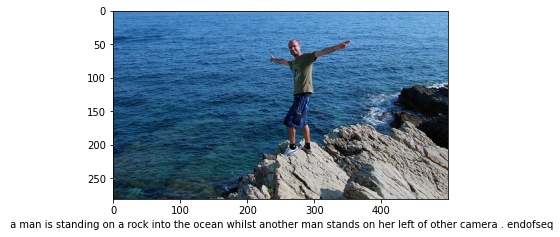

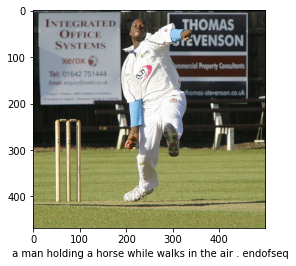

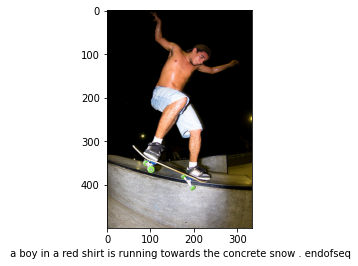

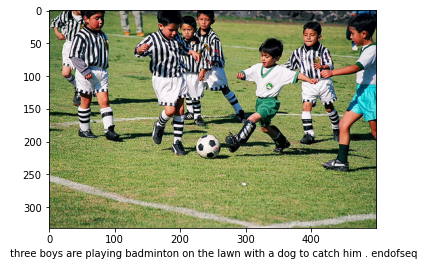

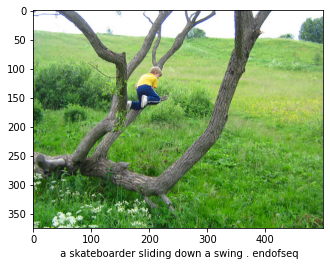

In [ ]:
for i in range(5):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)

In [ ]:
import numpy
numpy.__version__ 

'1.21.6'

In [ ]:
from platform import python_version
python_version()

'3.7.15'

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2
